### Problem Statement

<p></strong><br />Predicting fuel efficiency based on various automotive attributes, enabling manufacturers to optimize designs and gain a competitive edge. To develop a predictive model that effectively analyzes automotive attributes to provide precise fuel efficiency predictions. We will experiment with various machine learning models in order to find one that best predicts the fuel efficiency</p>


## About the Dataset
<p><strong>mpg</strong>: Car's fuel efficiency measured in miles per gallon.<br /><strong>cylinders</strong>: Number of cylinders in the car's engine.<br /><strong>displacement</strong>: Engine displacement in cubic inches.<br /><strong>horsepower</strong>: Engine power output measured in horsepower.<br /><strong>weight</strong>: Car's weight in pounds.<br /><strong>acceleration</strong>: Time taken for the car to reach a certain speed from standstill.<br /><strong>model_year</strong>: Year of manufacturing or model release.<br /><strong>origin</strong>: Country of origin or manufacture of the car.<br /><strong>car_name</strong>: Unique identifier for each car instance.</p>



<a id="lib"></a>
# 1. Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from outlier import smirnov_grubbs as grubbs
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [36]:
# load the csv file
# store the data in 'auto'
auto = pd.read_csv('autos_mpg.csv')
# display first five observations using head()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<a id="dtype"></a>
## 2.2 Check the Data Type

In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [38]:
# Checking Basic Statistical Details
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<a id="dtype"></a>
## 3.0 Data Cleaning

Data cleaning, also known as data cleansing or data scrubbing, is the process of identifying and correcting (or removing) errors, inconsistencies, and inaccuracies within a dataset.

In [39]:
#Checking Null Values
null_counts = auto.isna().sum()
null_counts

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [40]:
percent_missing = auto.isnull().sum() * 100 / len(auto)
percent_missing

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
car_name        0.0
dtype: float64

<a id="dtype"></a>
## 3.1 Treating Missing Values

In [41]:
#Replacing Null Values with mean value
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
mean_horsepower = auto['horsepower'].mean()
auto['horsepower'].fillna(mean_horsepower,inplace=True)

In [42]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [43]:
auto.to_csv("auto_corrected.csv")

In [44]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
null_counts = auto.isna().sum()
null_counts
percent_missing = auto.isnull().sum() * 100 / len(auto)
percent_missing

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
car_name        0.0
dtype: float64

<a id="dist"></a>
## 4.0 Exploratory Data Analysis

The purpose of EDA is to enhance our understanding of trends in the dataset without involving complicated machine learning models. Oftentimes, we can see obvious traits using graphs and charts just from plotting columns of the dataset against each other.

### 4.1 Detecting Outliers

### Plotting Box Plot to Observe Outliers

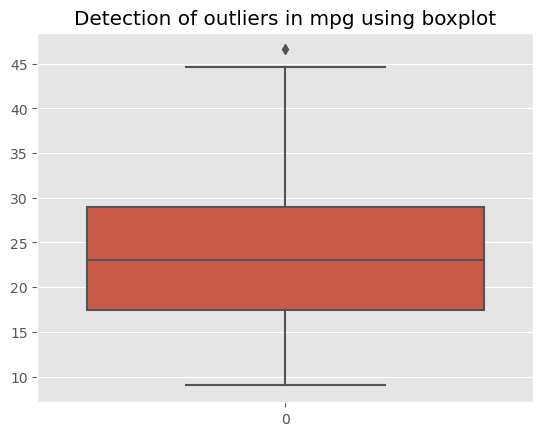

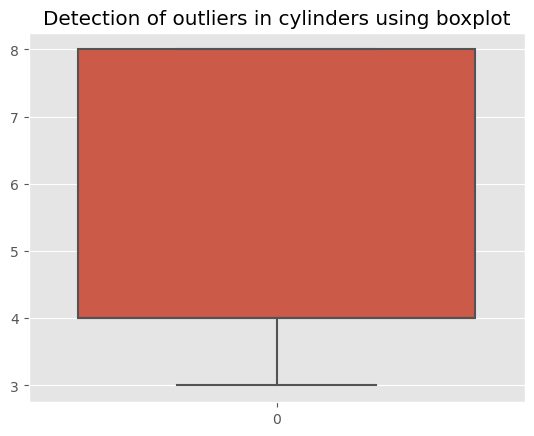

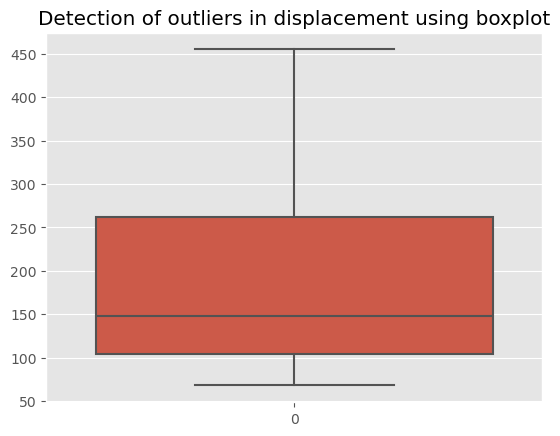

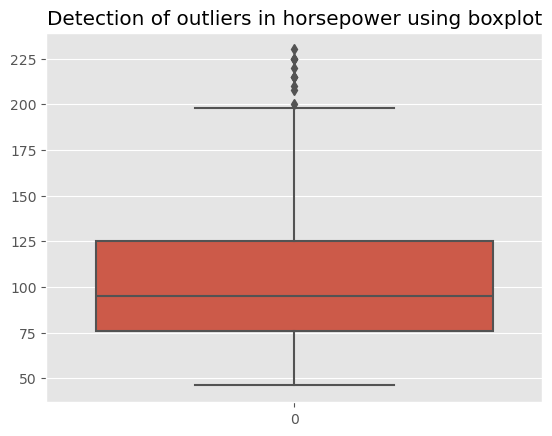

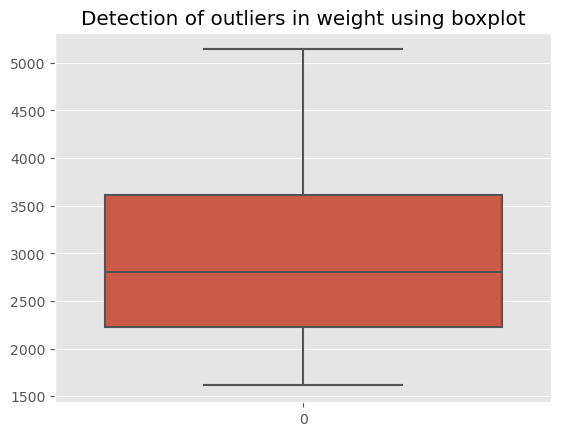

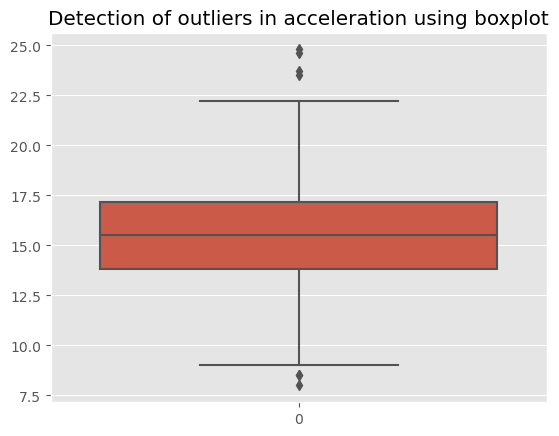

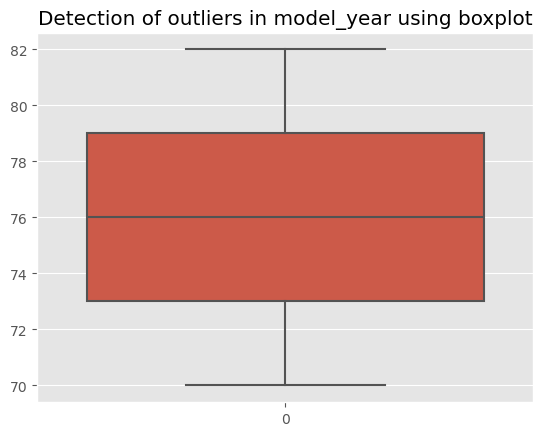

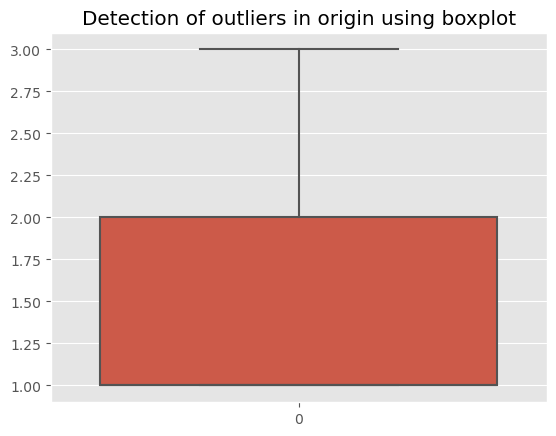

In [46]:
# now let's detect outliers in the numerical columns
num_col = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
for col in num_col:
    plt.style.use("ggplot")
    sns.boxplot(auto[col])
    plt.title("Detection of outliers in {} using boxplot".format(col))
    plt.show()

### 4.2 Checking Distribution of Variables using Histogram Plot

<Axes: ylabel='Frequency'>

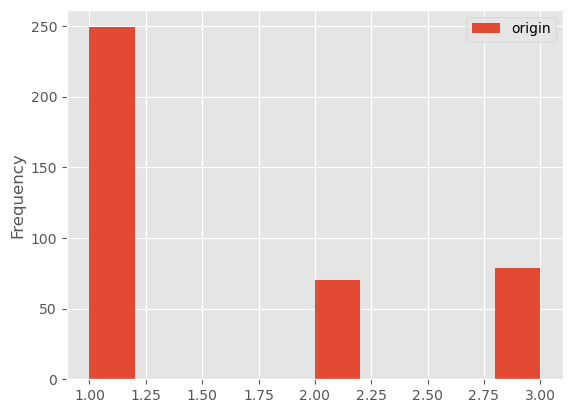

In [47]:
auto[['origin']].plot.hist()

We can observe from the above graph that the majority of vehicles belong from Origin 1

<Axes: ylabel='Frequency'>

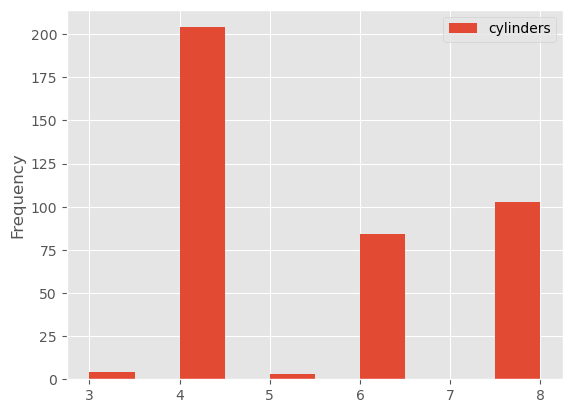

In [48]:
auto[['cylinders']].plot.hist()

We can observe from the above graph that the majority of vehicles have 4 Cylinders.

<Axes: ylabel='Frequency'>

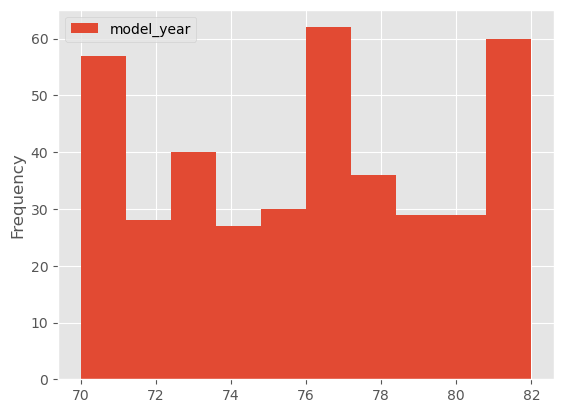

In [49]:
auto[['model_year']].plot.hist()

We can observe from the above graph that the majority of vehicles were manufactured from 1976 - 77

Analysing Relationship Between Independent Variables Using Scatter Plots

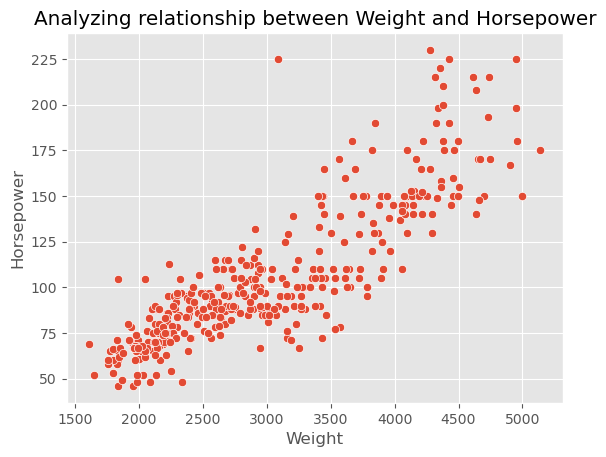

In [50]:
#Plotting Scatter plot for distribution between weight and horsepower
sns.scatterplot(x="weight",y="horsepower",data=auto)
plt.title("Analyzing relationship between Weight and Horsepower")
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.show()

From the plot it is observed that as the horsepower increases the weight also increases

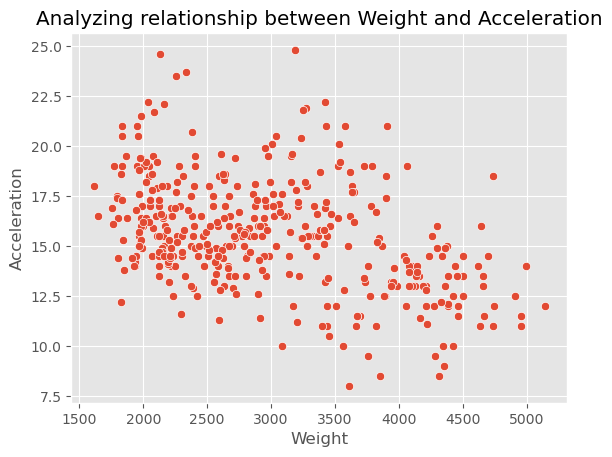

In [51]:
sns.scatterplot(x="weight",y="acceleration",data=auto)
plt.title("Analyzing relationship between Weight and Acceleration")
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.show()

From this distribution we can conclude that as weight increases the acceleration decreases

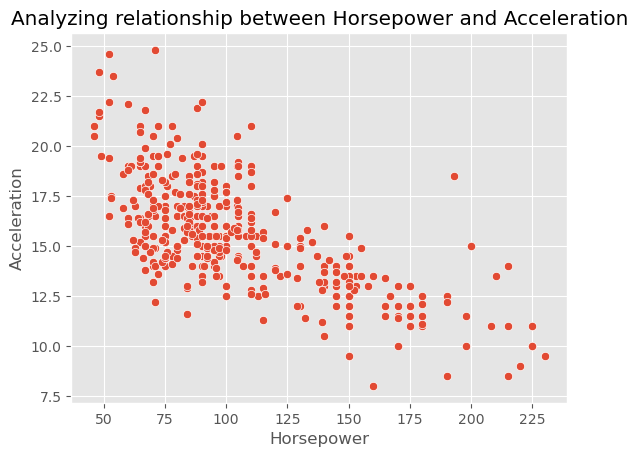

In [52]:
sns.scatterplot(x="horsepower",y="acceleration",data=auto)
plt.title("Analyzing relationship between Horsepower and Acceleration")
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
plt.show()

With increase in horsepower the acceleration of vechile decreases.

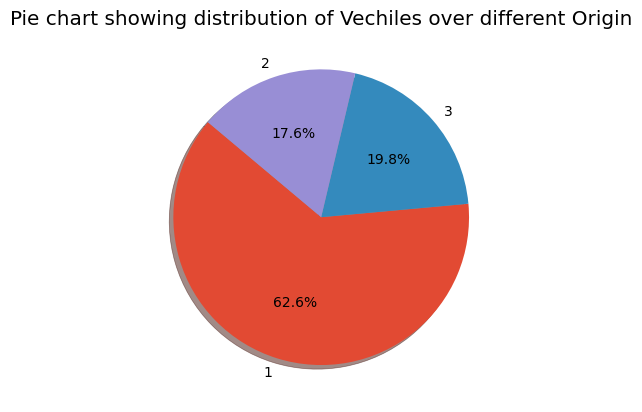

In [53]:
# plotting a pie chart to see distribution of Origin
sizes = auto["origin"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of Vechiles over different Origin")
plt.show()

# Numerical

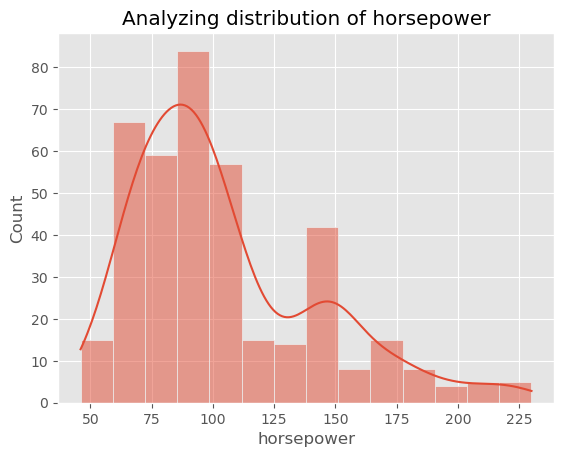

In [54]:
# Seeing how the numerical columns are distributed
sns.histplot(x="horsepower",data=auto,kde=True)
plt.title("Analyzing distribution of horsepower")
plt.show()

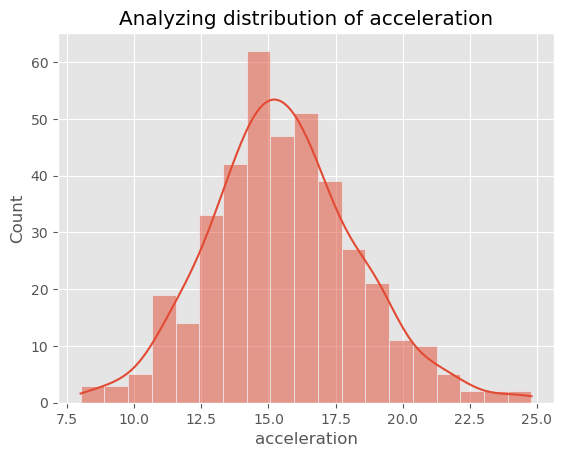

In [55]:
# Seeing how the numerical columns are distributed
sns.histplot(x="acceleration",data=auto,kde=True)
plt.title("Analyzing distribution of acceleration")
plt.show()

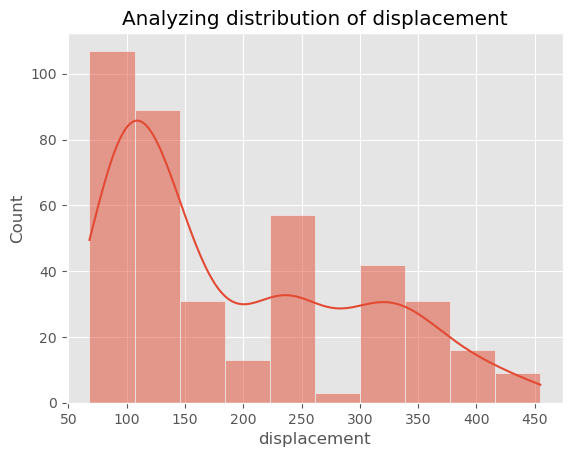

In [56]:
# Seeing how the numerical columns are distributed
sns.histplot(x="displacement",data=auto,kde=True)
plt.title("Analyzing distribution of displacement")
plt.show()

In [57]:
auto1 = auto.drop("car_name",axis =1)

## 4.3 Correlation Heatmap

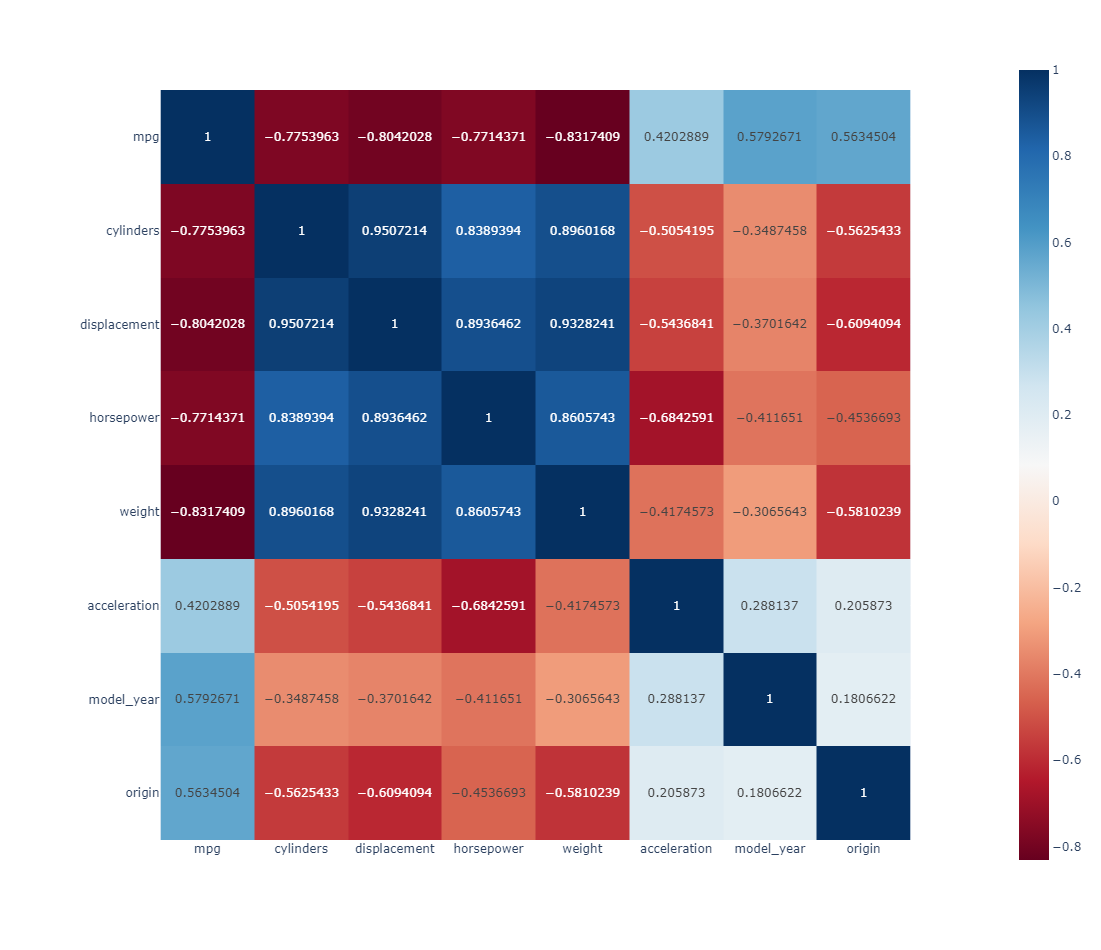

In [58]:
#Plotting Heatmap to Understand Relationship between numerical Variables
px.imshow(auto1.corr(), color_continuous_scale='RdBu', text_auto=True).update_layout(width=950, height=950)

In [59]:
#Removing Unwanted Columns
auto1.columns
auto1 = auto1.drop("model_year",axis =1)

In [60]:
auto1 = auto1.drop("origin",axis =1)

In [61]:
auto1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

## 5.0 Preprocessing

A crucial step in the data analysis process is preprocessing, which involves converting raw data into a format that computers and machine learning algorithms can understand. This important phase has a big impact on the precision and efficiency of machine learning models. 

## 5.1 Train-Test Split

In [62]:
# splitting data into features and target
X = auto1.drop("mpg",axis =1)
y = auto1["mpg"]

In [63]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [65]:
# making models to use
linreg = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()

models = [linreg,dtr,rfr,ridge,lasso]
model_name = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","Ridge","Lasso"]

average_rmse = []
average_r2_score = []
for model, name in zip(models,model_name):
    scores = ['neg_root_mean_squared_error',"r2"]
    cv_score_rmse = cross_val_score(model,X_train,y_train,cv=5,scoring = 'neg_root_mean_squared_error')
    cv_score_r2 = cross_val_score(model,X_train,y_train,cv=5,scoring = 'r2')
    average_rmse.append(np.mean(-1 * cv_score_rmse))
    average_r2_score.append(np.mean(cv_score_r2))
    print("RMSE scores of {} are {}".format(name,-1 * cv_score_rmse))
    print("R2 scores of {} are {}".format(name, cv_score_r2))
    #print("R2 score of {} are {}".format(name,cv_score))
    print("-" * 100)
    

RMSE scores of LinearRegression are [4.75396213 4.24293196 3.98818434 4.17994223 5.12847081]
R2 scores of LinearRegression are [0.58999165 0.71912538 0.6996028  0.6904819  0.63339747]
----------------------------------------------------------------------------------------------------
RMSE scores of DecisionTreeRegressor are [5.76481786 4.41427018 5.10861711 6.20995105 4.62309592]
R2 scores of DecisionTreeRegressor are [0.36028196 0.69414223 0.45747514 0.5152509  0.71790673]
----------------------------------------------------------------------------------------------------
RMSE scores of RandomForestRegressor are [4.23201598 3.84587147 4.24770359 3.84457109 3.96018114]
R2 scores of RandomForestRegressor are [0.67097468 0.771109   0.64677958 0.73147484 0.76884533]
----------------------------------------------------------------------------------------------------
RMSE scores of Ridge are [4.75389945 4.24292605 3.98823714 4.18006155 5.12803319]
R2 scores of Ridge are [0.59000246 0.719126

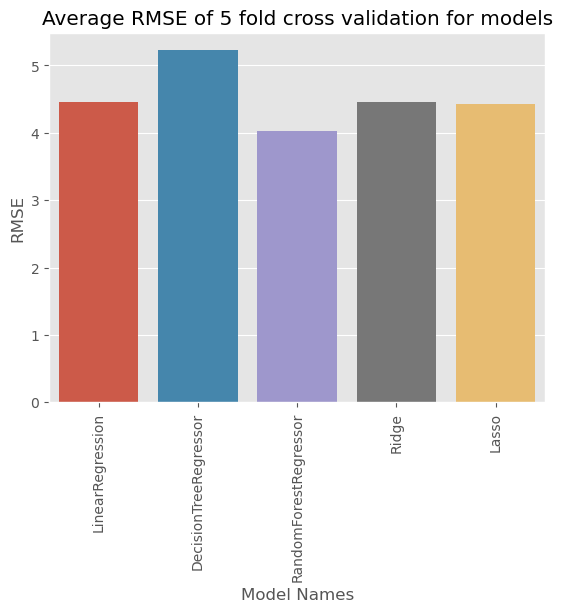

In [66]:
# visualizing RMSE
sns.barplot(x= model_name,y=average_rmse)
plt.title("Average RMSE of 5 fold cross validation for models")
plt.xticks(rotation=90)
plt.xlabel("Model Names")
plt.ylabel("RMSE")
plt.show()

- The barplot shows that RMSE for 5 fold cross validation is minimum for RandomForestRegressor. 

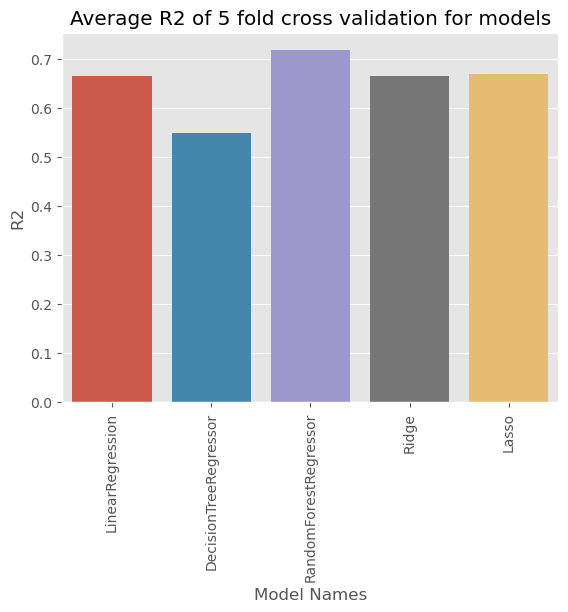

In [67]:
# visualizing R2
sns.barplot(x= model_name,y=average_r2_score)
plt.title("Average R2 of 5 fold cross validation for models")
plt.xticks(rotation=90)
plt.xlabel("Model Names")
plt.ylabel("R2")
plt.show()

- The barplot shows that r2 score is maximumn for RandomForestRegressor. R2 score means how much of the variance in the target variable is being exlained by the features, the greater the r2 score the greater the variance is explained

# Hyperparameter tuning
- Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [75]:
#Perform grid search cv to tune parameters for the RandomForestRegressor
n_estimators = [100, 200, 300, 500, 1000, 5000, 10000]
param_grid = {'n_estimators': n_estimators}


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, 
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False,
                   )
  
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

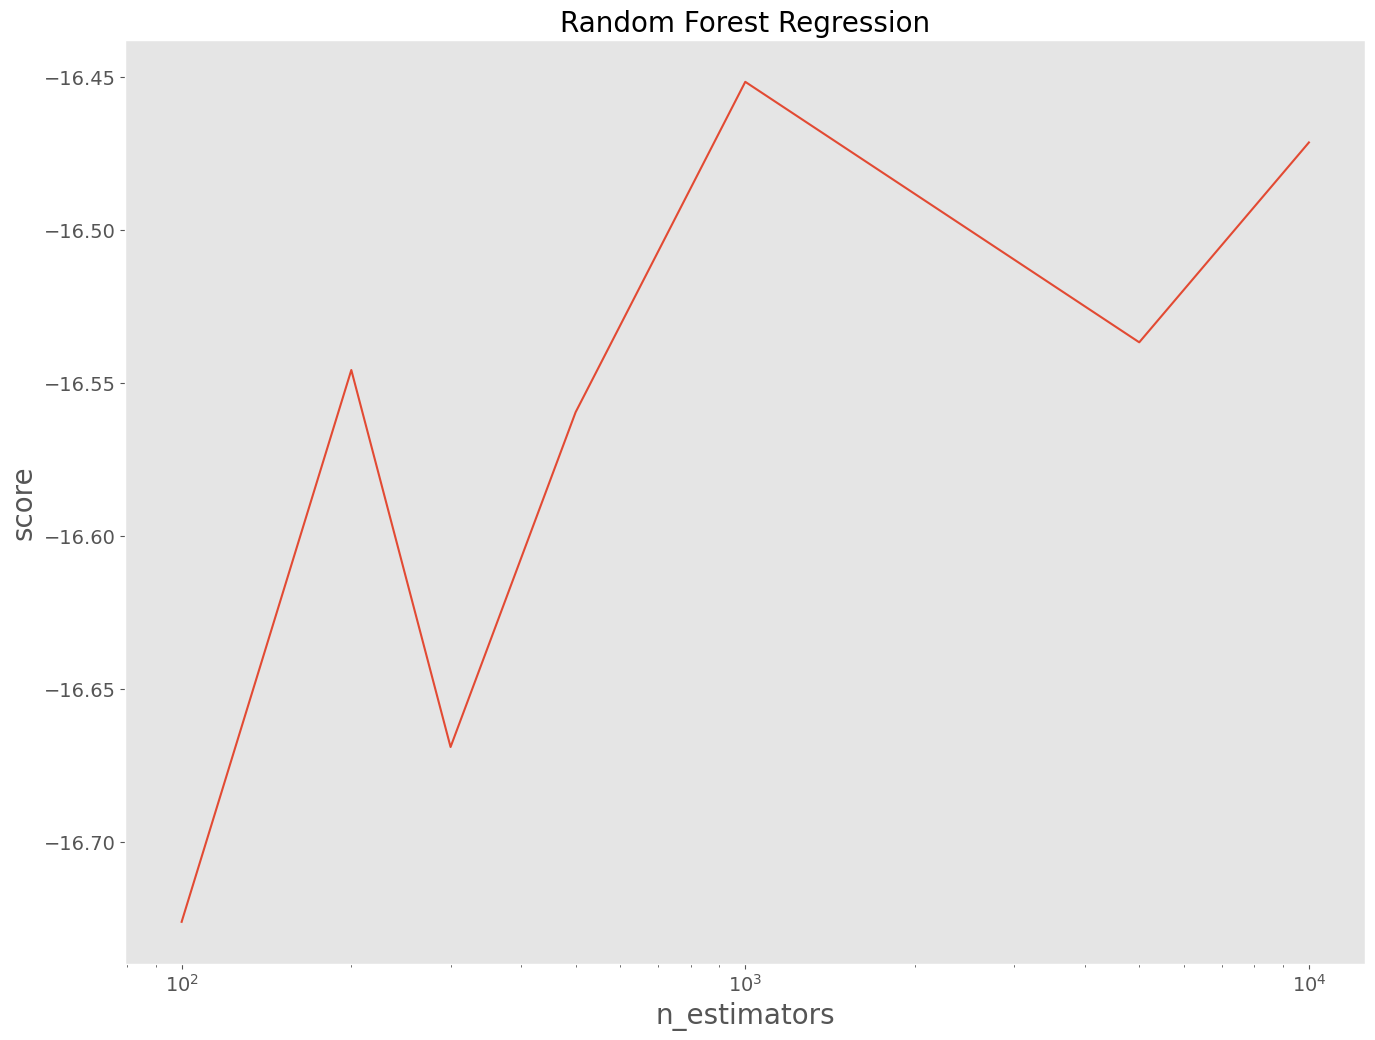

In [69]:
plt.figure(figsize=(16, 12))
plt.semilogx(n_estimators, scores)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Random Forest Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [70]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=1000)

In [71]:
y_pred = grid_search.predict(X_test)

In [72]:
r2 = r2_score(y_test, y_pred) 
r2

0.8074537531483623

In [73]:
#Saving Model Using Pickle Library
import pickle

In [74]:
with open("Fuel_Pred1.0.pkl","wb") as f:
    pickle.dump(grid_search,f)